CLUSTERING

In [3]:
# Import KMeans
from sklearn.cluster import KMeans
import numpy as np

# Sample data for points
points = np.random.rand(300, 2)

# Sample data for new_points
new_points = np.random.rand(100, 2)

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


[1 0 2 0 1 1 2 2 2 2 1 0 1 1 1 0 2 1 0 0 2 2 0 0 0 0 0 0 0 0 1 1 2 0 2 0 0
 1 0 1 0 0 2 0 1 2 1 0 1 1 1 0 0 1 1 0 0 2 2 2 0 0 1 1 0 0 0 1 0 2 1 0 0 0
 0 0 2 1 0 1 1 2 0 1 0 2 1 0 0 0 2 0 2 0 2 2 1 1 1 0]


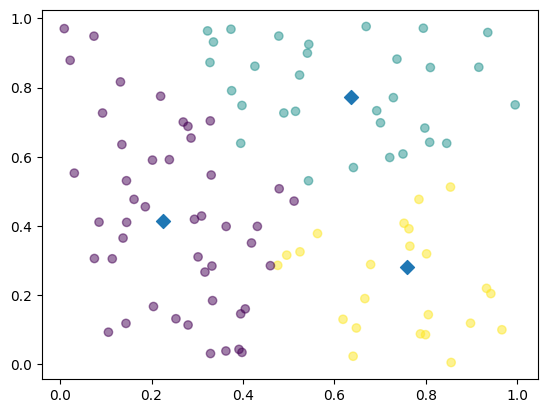

In [4]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()


/tmp/ipython-input-1074162716.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  samples = pd.read_csv('seeds_dataset.txt', delim_whitespace=True)


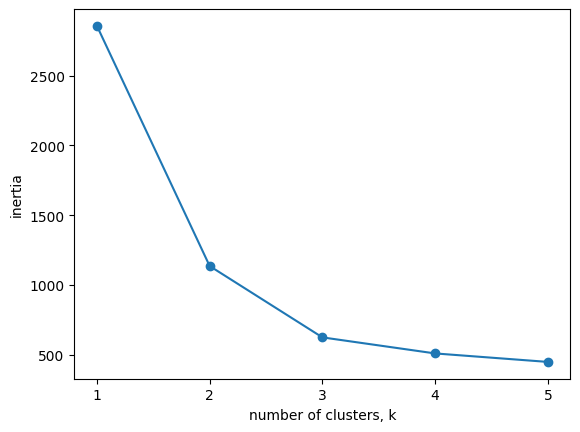

In [10]:
import pandas as pd

samples = pd.read_csv('seeds_dataset.txt', delim_whitespace=True)
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
import matplotlib.pyplot as plt
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

From the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian".

In [12]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters = 3)

# Use fit_predict to fit model and obtain cluster labels: labels
# Extract the features for clustering (all columns except the last one)
features = samples.iloc[:, :-1]
labels = model.fit_predict(features)

# Extract the varieties (the last column)
varieties = samples.iloc[:, -1]

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties   1   2   3
labels               
0           1  60   0
1          12   0  70
2          56  10   0


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters

SCALING FISH DATA FOR CLUSTERING

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

cols = ['Obs','Species','Weight','Length1','Length2','Length3','Height_pct','Width_pct','Sex']
df = pd.read_csv('fish.txt', sep=r'\s+', header=None, names=cols, engine='python')
print("Shape:", df.shape)
print(df.head())



Shape: (159, 9)
   Obs  Species  Weight  Length1  Length2  Length3  Height_pct  Width_pct  Sex
0    1        1   242.0     23.2     25.4     30.0        38.4       13.4  NaN
1    2        1   290.0     24.0     26.3     31.2        40.0       13.8  NaN
2    3        1   340.0     23.9     26.5     31.1        39.8       15.1  NaN
3    4        1   363.0     26.3     29.0     33.5        38.0       13.3  NaN
4    5        1   430.0     26.5     29.0     34.0        36.6       15.1  NaN


In [20]:
df['Height_cm'] = df['Height_pct'] * df['Length3'] / 100.0
df['Width_cm']  = df['Width_pct']  * df['Length3'] / 100.0

feature_cols = ['Weight','Length1','Length2','Length3','Height_cm','Width_cm','Sex']
X = df[feature_cols].apply(pd.to_numeric, errors='coerce')
y = df['Species']

In [21]:
imputer = SimpleImputer(strategy='mean')
scaler  = StandardScaler()
kmeans  = KMeans(n_clusters=7, n_init=10, random_state=42)

pipe = make_pipeline(imputer, scaler, kmeans)

pipe.fit(X)
labels = pipe.predict(X)

ct = pd.crosstab(labels, y, rownames=['cluster'], colnames=['species'])
print(ct)

species   1  2   3  4  5  6   7
cluster                        
0        15  2   3  2  0  4   5
1         0  0   0  3  5  0   1
2        14  2   0  0  0  6  16
3         0  0   1  1  9  0   4
4         0  2  16  5  0  1  29
5         0  0   0  0  0  5   0
6         6  0   0  0  0  1   1


CLUSTERING STOCKS USING KMEANS
(using daily price movements from 2010 to 2015 (obtained from Yahoo! Finance))

In [23]:
# Import Normalizer
from sklearn.preprocessing import Normalizer
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

movements = pd.read_csv('/content/company-stock-movements-2010-2015-incl.csv')

# Exclude the first column which contains company names
numeric_movements = movements.iloc[:, 1:]

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters = 10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements (using only numeric columns)
pipeline.fit(numeric_movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

Which company have stock prices that tend to change in the same way?

In [25]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
# Use the same data for prediction as for fitting (excluding the company names)
labels = pipeline.predict(numeric_movements)

# Extract the company names from the original movements DataFrame
companies = movements.iloc[:, 0]

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
14       0                                Dell
22       0                                  HP
19       1                     GlaxoSmithKline
6        1            British American Tobacco
25       1                   Johnson & Johnson
31       1                           McDonalds
30       1                          MasterCard
39       1                              Pfizer
49       1                               Total
52       1                            Unilever
43       1                                 SAP
46       1                      Sanofi-Aventis
41       1                       Philip Morris
42       1                   Royal Dutch Shell
37       1                            Novartis
20       2                          Home Depot
16       2                   General Electrics
32       2                                  3M
54       2                            Walgreen
58       2                               Xerox
55       3   